# Author - Gaurav Tuklia
# GRIP: The Sparks Foundation
## Data Science & Business Analytics Intern
### Task-2: Prediction using Unsupervised ML 
#### Batch - December 2021
Task: 
1. From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Importing and Reading Data from csv file 

In [17]:
data = pd.read_csv("Iris.csv")
data.head()                     #head(): Reading first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the Data

In [18]:
#Checking the Shape of the dataset
#shape: A tuple representing the dimensionality of the DataFrame.
data.shape

(150, 5)

In [20]:
#Using describe function
#describe: Returns summary statistics of the Series or DataFrame provided.
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
#Checking if any null values are present in the data
data.isnull == True

False

#### False means there are no null values in the given data

## Predicting Optimal Number of Clusters

### There are various methods to predict the optimal number of clusters. In this task, we will be using KMeans Clustering Algorithm. An important part of this algorithm is finding the optimal number of clusters. Here, we will use The Elbow Method for finding the optimal value of K, i.e. Number of clusters. 

In [22]:
#Finding the optimum number of clusters for KMeans Clustering

X = data.iloc[:, [0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame({"No. of Clusters": range(1,11), "WCSS Value": wcss})

,No. of Clusters,WCSS Value
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.345409
4,5,46.535582
5,6,38.938740
6,7,34.190688
7,8,29.905374
8,9,27.927882
9,10,25.955497


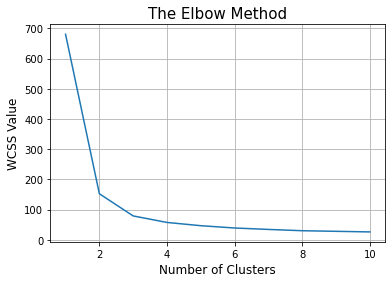

In [23]:
#Plotting Number of Clusters vs. WCSS Value

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("WCSS Value", size=12)
plt.grid()
plt.show()

#### From the above plot, we can see that the line bend at point 3. Therefore, we choose the number of clusters, i.e. K equal to 3.
#### Applying kmeans to the dataset with number of clusters, i.e. K = 3

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(X)

#### Visualizing the Clusters along with the centroids of each cluster - On the first two columns

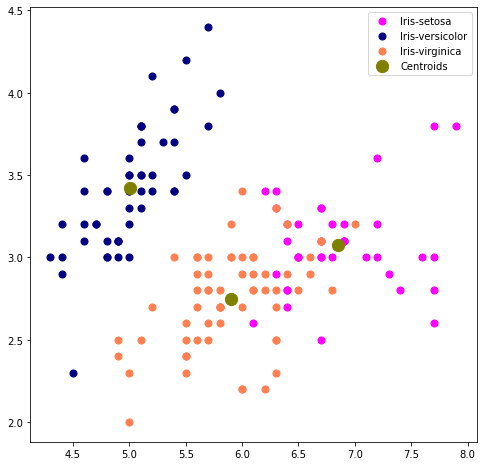

In [45]:
#Visualizing the 3 clusters
plt.figure(figsize = [8,8])
plt.scatter(X[Y_kmeans == 0,0], X[Y_kmeans == 0,1], s = 50, c = 'magenta', label = 'Iris-setosa')
plt.scatter(X[Y_kmeans == 1,0], X[Y_kmeans == 1,1], s = 50, c = 'navy', label = 'Iris-versicolor')
plt.scatter(X[Y_kmeans == 2,0], X[Y_kmeans == 2,1], s = 50, c = 'coral', label = 'Iris-virginica')

#Plotting the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'olive', label = 'Centroids')
plt.legend()
plt.show()

#### Visualizing the Clusters along with the centroids of each cluster - On the first three columns

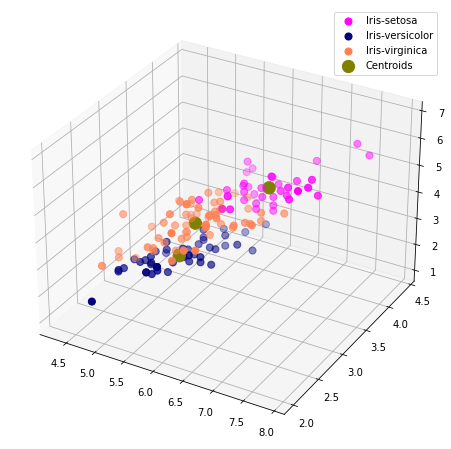

In [60]:
#Visualizing the 3 clusters
plt.figure(figsize=[8,8])
axis = plt.axes(projection ="3d")
axis.scatter3D(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], X[Y_kmeans == 0, 2], s = 50, c = 'magenta', label = 'Iris-setosa')
axis.scatter3D(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], X[Y_kmeans == 1, 2], s = 50, c = 'navy', label = 'Iris-versicolor')
axis.scatter3D(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], X[Y_kmeans == 2, 2], s = 50, c = 'coral', label = 'Iris-virginica')

#Plotting the centroids of each cluster
axis.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 150, c = 'olive', label = 'Centroids', alpha = 1.0)
plt.legend()
plt.show()

## Thus, we got 3 clusters and we represented it visually.

                                                Thank You